# dFC

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
homedir = os.path.expanduser("~")
workdir = os.path.join(homedir, "Box/CogNeuroLab/Aging Decision Making R01/data/")
os.path.exists(workdir)

True

In [3]:
dt = pd.read_csv(homedir + "/Desktop/mean_dwell_time_4.csv")
dt.index = dt['file'].str.split("processed/", expand=True)[1].str.split("_img", expand=True)[0]
dt.index = dt.index.astype(str)
dt = dt.drop('file', axis=1)
dt

dt_s1      dt_s2      dt_s3      dt_s4
0                                            
30004   15.0  37.666667  22.000000  30.000000
30008   60.0  24.333333   0.000000  19.250000
30009    0.0  21.666667  49.000000  24.000000
30012    0.0  28.250000   0.000000  24.250000
30015    4.0  11.500000  15.666667  16.142857
...      ...        ...        ...        ...
40773    2.0  16.000000  40.000000  20.000000
40777    0.0  56.000000   7.000000  14.000000
40782   17.0   0.000000  28.500000  26.333333
40796    7.0  21.000000  12.000000  56.666667
40803   11.0  15.666667  16.333333   7.000000

[76 rows x 4 columns]

In [4]:
act = pd.read_csv(workdir + "actigraphy/circadian_measures/7_days/cr_7days.csv")
act = act.set_index('record_id')
act.index = act.index.astype(str)
act = act.loc[:, ~act.columns.str.contains('^Unnamed')]
act

actamp     actbeta     actphi    actmin  actmesor  actupmesor  \
record_id                                                                    
40768      1.327909    5.262666  15.921573  0.581143  1.245098    9.547039   
30403      1.793479   11.030749  13.967678  0.000000  0.896739    4.406224   
40773      1.701935    6.313446  14.968212  0.029421  0.880389    7.188163   
30242      1.346082    8.572728  18.967792  0.266425  0.939466   12.251618   
30584      1.920344    7.730889  17.752176  0.000000  0.960172    9.445765   
...             ...         ...        ...       ...       ...         ...   
30095      1.579977    9.358037  17.126207  0.117707  0.907696    9.812011   
40653      1.768435    9.227050  13.976995  0.037960  0.922178    5.045540   
40758      1.305116  194.804102  15.130947  0.159567  0.812125    6.898319   
30395      1.462968   11.884609  16.837803  0.067563  0.799047    7.981154   
40623      1.637567    8.614504  15.631333  0.130142  0.948925    8.029391   

           actdownmesor   actalph  actwidthratio    rsqact         fact  \
record_id                                                                 
40768         22.296107 -0.097894       0.531211  0.297279  2207.847464   
30403         23.529131 -0.803043       0.796788  0.298290  2218.547972   
40773         22.748260 -0.449329       0.648337  0.457301  4372.467197   
30242         25.683965 -0.186396       0.559681  0.339740  2685.467417   
30584         26.058586 -0.567787       0.692201  0.550293  6349.631633   
...                 ...       ...            ...       ...          ...   
30095         24.440404 -0.337306       0.609516  0.462228  4485.860656   
40653         22.908450 -0.694303       0.744288  0.401769  3484.912618   
40758         23.363575 -0.551781       0.686052  0.383081  3222.157416   
30395         25.694453 -0.680077       0.738054  0.310075  2332.108320   
40623         23.233276 -0.407200       0.633495  0.476643  4725.829708   

              fnlrgact  
record_id               
40768       303.912089  
30403      1445.744950  
40773      1179.820592  
30242       696.984716  
30584      2156.924640  
...                ...  
30095      1171.168423  
40653      2287.671496  
40758      1281.090194  
30395      1363.285326  
40623      1333.631534  

[119 rows x 12 columns]

In [5]:
nact = pd.read_csv(workdir + "actigraphy/circadian_measures/7_days/nparact_7days.csv")
nact = nact.set_index('record_id')
nact.index = nact.index.astype(str)
nact

IS    IV    RA     L5 L5_starttime     M10 M10_starttime
record_id                                                            
30003      0.38  1.29  0.89  14.10     00:51:30  246.14      12:34:30
30004      0.43  0.57  0.85  12.61     19:54:30  156.15      05:17:30
30008      0.48  0.68  0.90   7.56     20:26:30  147.40      02:00:30
30009      0.42  1.31  0.92  11.58     19:34:30  286.35      06:21:30
30019      0.45  0.71  0.94   4.67     20:08:30  145.78      06:16:30
...         ...   ...   ...    ...          ...     ...           ...
40825      0.33  1.02  0.69  12.10     20:04:00   66.25      02:49:00
40855      0.58  1.27  0.91   6.16     18:36:30  135.32      02:37:30
40861      0.33  1.33  0.59  26.04     15:42:30  102.37      00:49:30
40876      0.49  0.93  0.83  14.47     21:08:30  152.05      07:38:30
40878      0.64  0.56  0.88  11.87     18:31:30  179.77      05:42:30

[108 rows x 7 columns]

In [6]:
sleep = pd.read_csv(workdir + "actigraphy/actiware_exports/sleep_metrics_summarized.csv")
sleep = sleep.set_index('subject_id')
sleep.index = sleep.index.astype(str)
sleep = sleep.dropna(axis=1)
sleep

duration_mean_active  duration_mean_daily  duration_mean_rest  \
subject_id                                                                  
30003                1015.285714          1285.357143          360.714286   
30004                 937.071429          1263.428571          436.428571   
30008                 872.928571          1251.214286          501.857143   
30009                 981.214286          1317.000000          455.142857   
30012                 914.857143          1288.571429          465.000000   
...                          ...                  ...                 ...   
40859                 734.642857          1270.500000          455.357143   
40861                 809.000000          1439.928571          569.428571   
40876                 829.214286          1268.500000          536.125000   
40878                 877.000000          1440.000000          472.642857   
40891                 985.357143          1397.035714          319.250000   

            duration_mean_sleep  total_ac_mean_active  total_ac_mean_daily  \
subject_id                                                                   
30003                277.071429         434502.428571        413833.571429   
30004                405.500000         268200.428571        256354.142857   
30008                446.071429         258591.142857        248470.142857   
30009                436.357143         459317.285714        444756.285714   
30012                454.142857         378916.857143        368232.000000   
...                         ...                   ...                  ...   
40859                432.071429         279034.142857        309421.571429   
40861                492.785714         163062.857143        212225.285714   
40876                495.625000         236108.714286        250173.142857   
40878                435.714286         274821.000000        317027.714286   
40891                212.178571         139901.857143        167299.142857   

            total_ac_mean_rest  total_ac_mean_sleep  onset_latency_mean_sleep  \
subject_id                                                                      
30003              8933.857143          5712.285714                 31.928571   
30004              4959.714286          3570.000000                  8.642857   
30008              5845.428571          3296.000000                 28.428571   
30009              7519.428571          6431.571429                  9.857143   
30012              7241.571429          6606.285714                  5.500000   
...                        ...                  ...                       ...   
40859             16904.857143         14711.142857                 15.000000   
40861             41203.857143         35728.428571                 30.285714   
40876             27256.875000         24926.875000                 19.000000   
40878             11483.571429          9597.857143                 10.000000   
40891             10043.428571          2209.571429                 66.428571   

            efficiency_mean_sleep  ...  total_ac_min_active  \
subject_id                         ...                        
30003                   61.785714  ...               263542   
30004                   87.394286  ...                83266   
30008                   83.851429  ...                65215   
30009                   86.574286  ...               270113   
30012                   88.382857  ...               245542   
...                           ...  ...                  ...   
40859                   81.862857  ...                66308   
40861                   62.092857  ...                12063   
40876                   79.028750  ...                76144   
40878                   81.737143  ...                40547   
40891                   64.990000  ...                24159   

            total_ac_min_daily  total_ac_min_rest  total_ac_min_sleep  \
subject_id                                      

In [7]:
d = dt.join(act).join(nact)
d = d.join(sleep)
d['Group'] = np.where(d.index.str.startswith('3'), 'Young Adults', 'Older Adults')
d

dt_s1      dt_s2      dt_s3      dt_s4    actamp    actbeta     actphi  \
0                                                                               
30004   15.0  37.666667  22.000000  30.000000  1.630892   4.438790  15.128163   
30008   60.0  24.333333   0.000000  19.250000  1.610484   7.306045  15.569911   
30009    0.0  21.666667  49.000000  24.000000  1.951245   7.026165  14.377649   
30012    0.0  28.250000   0.000000  24.250000  1.634365  11.913063  15.484577   
30015    4.0  11.500000  15.666667  16.142857       NaN        NaN        NaN   
...      ...        ...        ...        ...       ...        ...        ...   
40773    2.0  16.000000  40.000000  20.000000  1.701935   6.313446  14.968212   
40777    0.0  56.000000   7.000000  14.000000  1.129945  26.210610  10.538072   
40782   17.0   0.000000  28.500000  26.333333  1.867222   9.777417  15.684797   
40796    7.0  21.000000  12.000000  56.666667  1.417970  28.079178  12.807291   
40803   11.0  15.666667  16.333333   7.000000  1.601577   5.722114  14.585784   

         actmin  actmesor  actupmesor  ...  total_ac_min_daily  \
0                                      ...                       
30004  0.000000  0.815446    6.927406  ...             35942.0   
30008  0.139627  0.944868    7.708287  ...               694.0   
30009  0.081641  1.057264    6.388996  ...            150605.0   
30012  0.248477  1.065659    7.712380  ...            239967.0   
30015       NaN       NaN         NaN  ...            303140.0   
...         ...       ...         ...  ...                 ...   
40773  0.029421  0.880389    7.188163  ...             52794.0   
40777  0.155596  0.720569    2.749486  ...             90384.0   
40782  0.124823  1.058434    8.075216  ...             45978.0   
40796  0.089698  0.798683    5.820037  ...             12229.0   
40803  0.075652  0.876440    7.798680  ...              9369.0   

       total_ac_min_rest  total_ac_min_sleep  onset_latency_min_sleep  \
0                                                                       
30004              860.0               820.0                      0.0   
30008             3363.0              2090.0                      5.0   
30009             3623.0              2077.0                      0.0   
30012             3082.0              3082.0                      0.0   
30015             3324.0              3227.0                      0.0   
...                  ...                 ...                      ...   
40773             3467.0              1370.0                      0.0   
40777             4213.0              2570.0                      3.0   
40782             5808.0              4377.0                      0.0   
40796             1900.0              1564.0                      0.5   
40803             3542.0              2639.0                      0.0   

       efficiency_min_sleep  sleep_time_min_active  sleep_time_min_daily  \
0                                                                          
30004                 72.98                   69.5                 113.0   
30008                 79.31                   49.0                 108.0   
30009                 84.47                   38.5                 152.0   
30012                 78.88                   40.0                 161.5   
30015                 80.00                   43.0                 457.5   
...                     ...                    ...                   ...   
40773                 77.47                   65.0                 182.5   
40777                 52.97                  146.0                 678.5   
40782                 82.08                   25.0                 161.0   
40796                 88.76                  112.0                  44.0   
40803                 86.03                  151.5                 207.0   

       sleep_time_min_rest  sleep_time_min_sleep         Group  
0                                                               
30004                302.

In [8]:
do = d
d = do

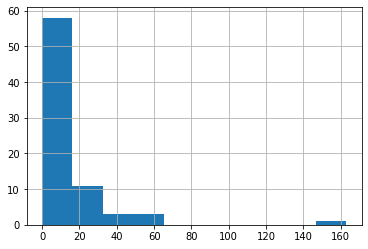

In [9]:
d['dt_s1'].hist()

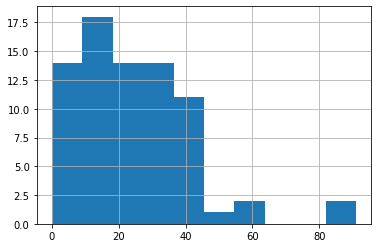

In [10]:
d['dt_s2'].hist()

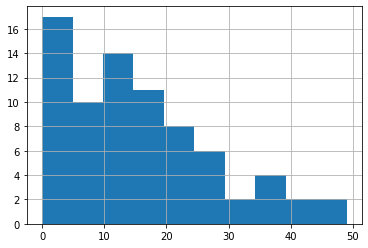

In [11]:
d['dt_s3'].hist()

In [12]:
d['dt_s4'].hist()

In [13]:
#d['dt_s5'].hist()

In [ ]:
ya = d[d['Group'] == 'Young Adults']
oa = d[d['Group'] == 'Older Adults']

(array([0.08892764, 0.03661726, 0.02615519, 0.01569311, 0.00523104,
        0.00523104, 0.00523104, 0.        , 0.        , 0.01046207]),
 array([ 0.        ,  5.16666667, 10.33333333, 15.5       , 20.66666667,
        25.83333333, 31.        , 36.16666667, 41.33333334, 46.5       ,
        51.66666667]),
 <a list of 10 Patch objects>)

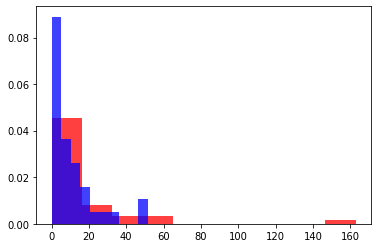

In [15]:
plt.hist(ya['dt_s1'], density=True, facecolor='r', alpha=0.75, label = 'YA')
plt.hist(oa['dt_s1'], density=True, facecolor='b', alpha=0.75, label = 'OA')

(array([0.03280737, 0.00937354, 0.02812061, 0.03749414, 0.00468677,
        0.01874707, 0.00937354, 0.01874707, 0.00468677, 0.00937354]),
 array([ 0.        ,  5.76666667, 11.53333333, 17.3       , 23.06666667,
        28.83333333, 34.6       , 40.36666667, 46.13333334, 51.9       ,
        57.66666667]),
 <a list of 10 Patch objects>)

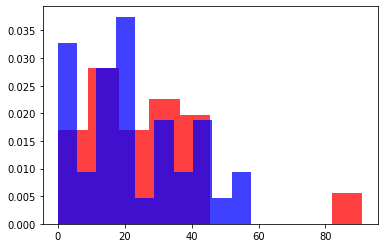

In [16]:
plt.hist(ya['dt_s2'], density=True, facecolor='r', alpha=0.75, label = 'YA')
plt.hist(oa['dt_s2'], density=True, facecolor='b', alpha=0.75, label = 'OA')

In [17]:
plt.hist(ya['dt_s3'], density=True, facecolor='r', alpha=0.75, label = 'YA')
plt.hist(oa['dt_s3'], density=True, facecolor='b', alpha=0.75, label = 'OA')

(array([0.03378378, 0.02702703, 0.03378378, 0.04054054, 0.03378378,
        0.01351351, 0.02027027, 0.02702703, 0.00675676, 0.01351351]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

(array([0.03450259, 0.02875216, 0.02012651, 0.00862565, 0.00287522,
        0.00575043, 0.        , 0.        , 0.        , 0.00575043]),
 array([ 3.5, 12.9, 22.3, 31.7, 41.1, 50.5, 59.9, 69.3, 78.7, 88.1, 97.5]),
 <a list of 10 Patch objects>)

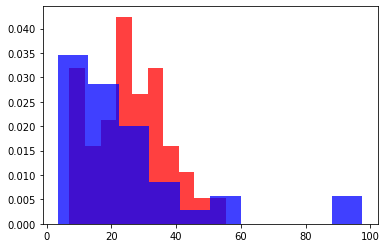

In [18]:
plt.hist(ya['dt_s4'], density=True, facecolor='r', alpha=0.75, label = 'YA')
plt.hist(oa['dt_s4'], density=True, facecolor='b', alpha=0.75, label = 'OA')

## Rhythm amplitude and dwell time

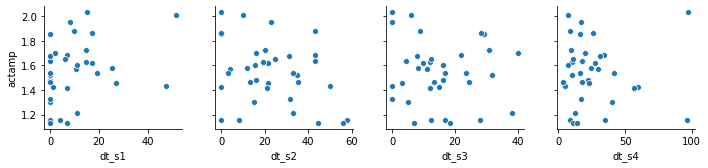

In [19]:
sns.pairplot(d[d['Group'] == 'Older Adults'], kind = 'scatter', x_vars = ['dt_s1', 'dt_s2', 'dt_s3', 'dt_s4'] , y_vars = ['actamp'], palette = 'Set1')


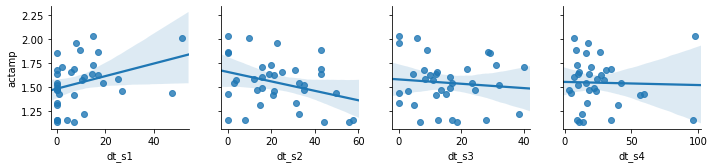

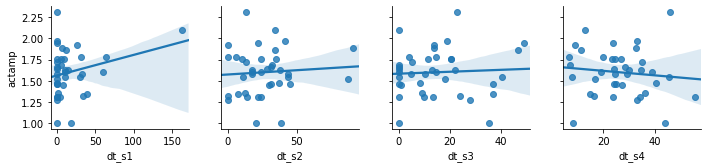

In [20]:
sns.pairplot(d[d['Group'] == 'Older Adults'], kind = 'reg', x_vars = ['dt_s1', 'dt_s2', 'dt_s3', 'dt_s4'] , y_vars = ['actamp'], palette = 'Set1')
sns.pairplot(d[d['Group'] == 'Young Adults'], kind = 'reg', x_vars = ['dt_s1', 'dt_s2', 'dt_s3', 'dt_s4'] , y_vars = ['actamp'], palette = 'Set1')


In [21]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s1 ~ actamp + Group + Group:actamp', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.316
Date:                Thu, 10 Sep 2020   Prob (F-statistic):             0.0833
Time:                        09:44:08   Log-Likelihood:                -329.06
No. Observations:                  73   AIC:                             666.1
Df Residuals:                      69   BIC:                             675.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -16.1020     24.042     -0.670      0.505     -64.065      31.861
Group[T.Young Adults]          -13.2902     32.510     -0.409      0.684     -78.145      51.565
actamp                          16.5987     15.388      1.079      0.284     -14.100      47.298
Group[T.Young Adults]:actamp    11.5894     20.449      0.567      0.573     -29.205      52.384
==============================================================================
Omnibus:                       82.466   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.968
Skew:                           3.330   Prob(JB):                    5.28e-212
Kurtosis:                      19.599   Cond. No.                         37.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s1 ~ actamp', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     5.852
Date:                Thu, 10 Sep 2020   Prob (F-statistic):             0.0181
Time:                        09:44:18   Log-Likelihood:                -329.67
No. Observations:                  73   AIC:                             663.3
Df Residuals:                      71   BIC:                             667.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.3385     15.968     -1.587      0.117     -57.177       6.500
actamp        24.2142     10.010      2.419      0.018       4.255      44.173
==============================================================================
Omnibus:                       87.958   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.781
Skew:                           3.606   Prob(JB):                    5.35e-258
Kurtosis:                      21.371   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s2 ~ actamp + Group + Group:actamp', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s2   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.322
Date:                Thu, 10 Sep 2020   Prob (F-statistic):              0.274
Time:                        09:44:41   Log-Likelihood:                -314.04
No. Observations:                  73   AIC:                             636.1
Df Residuals:                      69   BIC:                             645.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       56.5702     19.571      2.890      0.005      17.526      95.614
Group[T.Young Adults]          -38.7705     26.464     -1.465      0.147     -91.566      14.025
actamp                         -21.8795     12.527     -1.747      0.085     -46.870       3.111
Group[T.Young Adults]:actamp    27.2247     16.646      1.635      0.107      -5.984      60.434
==============================================================================
Omnibus:                       17.954   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.388
Skew:                           1.001   Prob(JB):                     3.07e-06
Kurtosis:                       5.084   Cond. No.                         37.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s2 ~ actamp + Group', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s2   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.6302
Date:                Thu, 10 Sep 2020   Prob (F-statistic):              0.535
Time:                        09:44:53   Log-Likelihood:                -315.43
No. Observations:                  73   AIC:                             636.9
Df Residuals:                      70   BIC:                             643.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                32.7885     13.255      2.474      0.016       6.352      59.225
Group[T.Young Adults]     3.9268      4.385      0.896      0.374      -4.819      12.672
actamp                   -6.4624      8.348     -0.774      0.441     -23.112      10.187
==============================================================================
Omnibus:                       19.441   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.733
Skew:                           1.083   Prob(JB):                     9.50e-07
Kurtosis:                       5.104   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exploratory Analysis

In [27]:
d = d[d['actbeta'] < 100]

### State 1

In [83]:
#sns.pairplot(d, hue = 'Group', kind = 'scatter', x_vars = ['actamp', 'actphi', 'actmin', 'actalph', 'actwidthratio', 'fact'], y_vars = ['dt_s1'], palette = 'Set1')


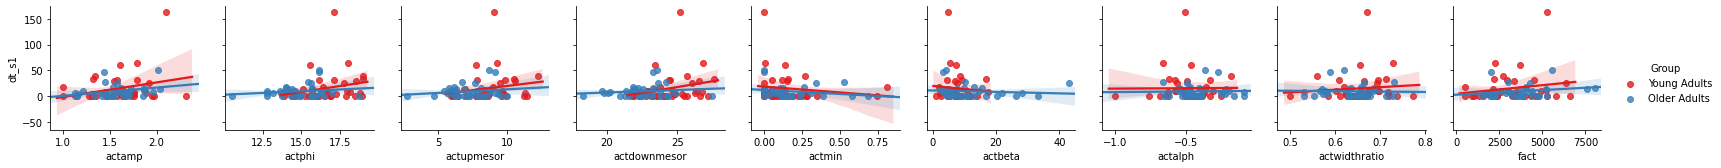

In [29]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['actamp', 'actphi', 'actupmesor', 'actdownmesor', 'actmin', 'actbeta', 'actalph', 'actwidthratio', 'fact'], y_vars = ['dt_s1'], palette = 'Set1')


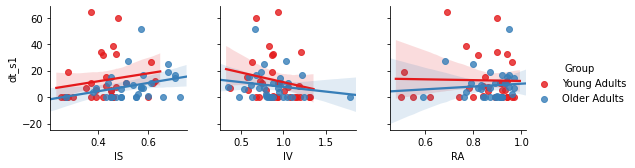

In [30]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['IS', 'IV', 'RA'], y_vars = ['dt_s1'], palette = 'Set1')


### State 2

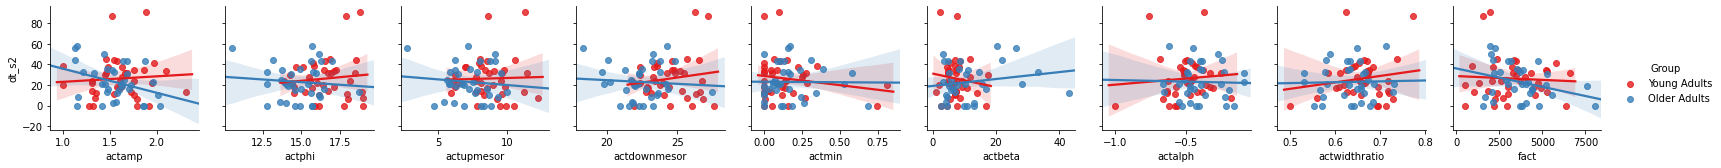

In [31]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['actamp', 'actphi', 'actupmesor', 'actdownmesor', 'actmin', 'actbeta', 'actalph', 'actwidthratio', 'fact'], y_vars = ['dt_s2'], palette = 'Set1')


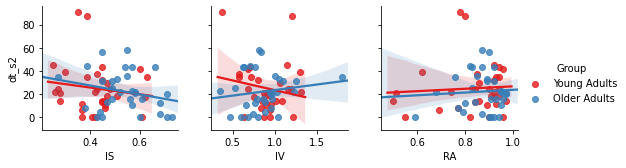

In [32]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['IS', 'IV', 'RA'], y_vars = ['dt_s2'], palette = 'Set1')


### State 3

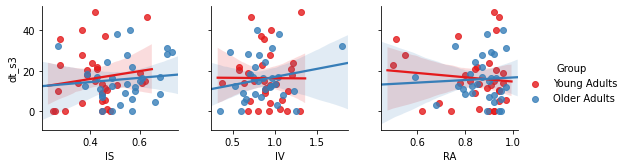

In [35]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['IS', 'IV', 'RA'], y_vars = ['dt_s3'], palette = 'Set1')


### State 4

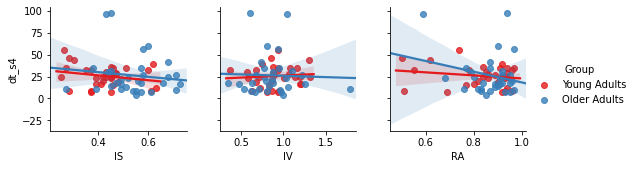

In [36]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['IS', 'IV', 'RA'], y_vars = ['dt_s4'], palette = 'Set1')


## Actiware sleep variables

In [37]:
sleep_cols = d.columns[(d.columns.str.contains('mean')) & (d.columns.str.contains('sleep'))]
sleep_cols

Index(['duration_mean_sleep', 'total_ac_mean_sleep',
       'onset_latency_mean_sleep', 'efficiency_mean_sleep',
       'sleep_time_mean_active', 'sleep_time_mean_daily',
       'sleep_time_mean_rest', 'sleep_time_mean_sleep'],
      dtype='object')

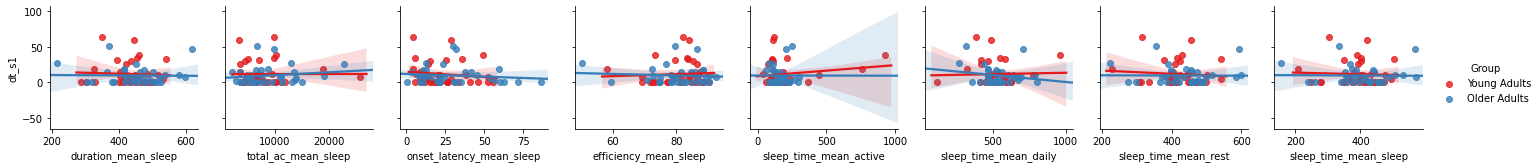

In [84]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = sleep_cols, y_vars = ['dt_s1'], palette = 'Set1')


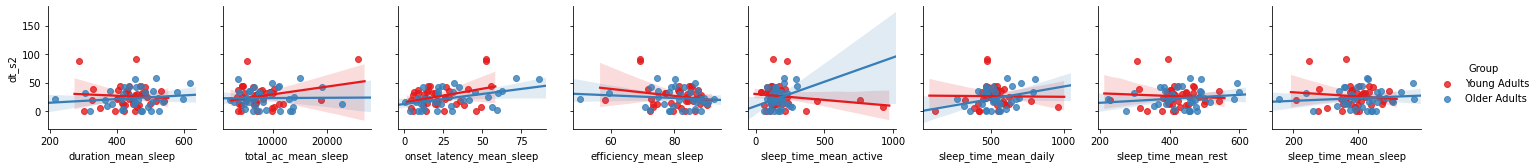

In [39]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = sleep_cols, y_vars = ['dt_s2'], palette = 'Set1')


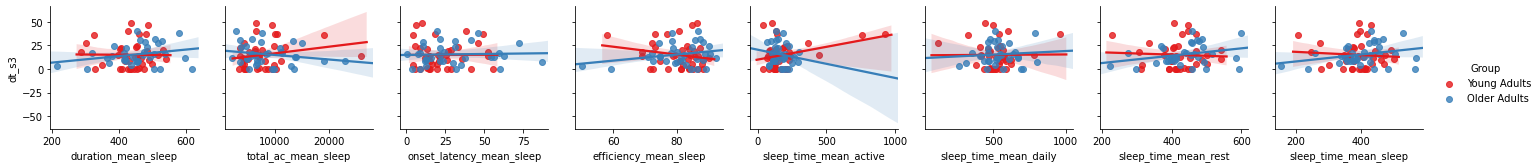

In [40]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = sleep_cols, y_vars = ['dt_s3'], palette = 'Set1')


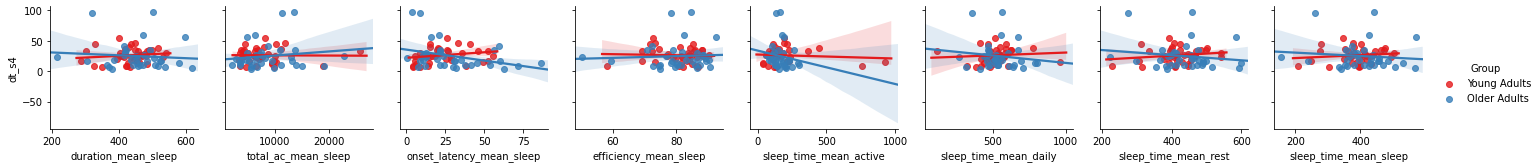

In [41]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = sleep_cols, y_vars = ['dt_s4'], palette = 'Set1')

In [42]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s1 ~ IS + Group + Group:IS', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.360
Date:                Thu, 10 Sep 2020   Prob (F-statistic):              0.264
Time:                        09:52:20   Log-Likelihood:                -256.11
No. Observations:                  63   AIC:                             520.2
Df Residuals:                      59   BIC:                             528.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.0557     13.632     -0.591      0.557     -35.334      19.223
Group[T.Young Adults]        8.1453     17.629      0.462      0.646     -27.130      43.420
IS                          31.1937     24.865      1.255      0.215     -18.560      80.948
Group[T.Young Adults]:IS    -1.4592     35.736     -0.041      0.968     -72.966      70.048
==============================================================================
Omnibus:                       35.625   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.023
Skew:                           1.900   Prob(JB):                     3.10e-17
Kurtosis:                       6.811   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s1 ~ IS + Group', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.073
Date:                Thu, 10 Sep 2020   Prob (F-statistic):              0.135
Time:                        09:52:27   Log-Likelihood:                -256.11
No. Observations:                  63   AIC:                             518.2
Df Residuals:                      60   BIC:                             524.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -7.6756      9.876     -0.777      0.440     -27.431      12.079
Group[T.Young Adults]     7.4462      4.167      1.787      0.079      -0.888      15.781
IS                       30.4873     17.710      1.722      0.090      -4.937      65.912
==============================================================================
Omnibus:                       35.653   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.164
Skew:                           1.901   Prob(JB):                     2.89e-17
Kurtosis:                       6.816   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s1 ~ IV + Group + Group:IV', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.074
Date:                Thu, 10 Sep 2020   Prob (F-statistic):              0.367
Time:                        09:52:38   Log-Likelihood:                -256.54
No. Observations:                  63   AIC:                             521.1
Df Residuals:                      59   BIC:                             529.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   14.8588      8.921      1.666      0.101      -2.993      32.710
Group[T.Young Adults]       11.0132     14.072      0.783      0.437     -17.144      39.170
IV                          -7.1230      9.903     -0.719      0.475     -26.939      12.693
Group[T.Young Adults]:IV    -7.4634     15.324     -0.487      0.628     -38.127      23.200
==============================================================================
Omnibus:                       32.575   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.582
Skew:                           1.810   Prob(JB):                     4.24e-14
Kurtosis:                       6.218   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s1 ~ Group + IV', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.511
Date:                Thu, 10 Sep 2020   Prob (F-statistic):              0.229
Time:                        09:52:45   Log-Likelihood:                -256.67
No. Observations:                  63   AIC:                             519.3
Df Residuals:                      60   BIC:                             525.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                17.5416      6.973      2.516      0.015       3.593      31.490
Group[T.Young Adults]     4.4025      3.688      1.194      0.237      -2.975      11.780
IV                      -10.2401      7.509     -1.364      0.178     -25.261       4.780
==============================================================================
Omnibus:                       32.403   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.769
Skew:                           1.806   Prob(JB):                     6.37e-14
Kurtosis:                       6.178   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s1 ~ RA', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                  0.009179
Date:                Thu, 10 Sep 2020   Prob (F-statistic):              0.924
Time:                        09:52:53   Log-Likelihood:                -258.21
No. Observations:                  63   AIC:                             520.4
Df Residuals:                      61   BIC:                             524.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1104     14.421      0.840      0.404     -16.725      40.946
RA            -1.6051     16.754     -0.096      0.924     -35.107      31.896
==============================================================================
Omnibus:                       35.431   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.670
Skew:                           1.927   Prob(JB):                     1.66e-16
Kurtosis:                       6.582   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s4 ~ actmin', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s4   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.514
Date:                Sat, 05 Sep 2020   Prob (F-statistic):              0.117
Time:                        14:13:21   Log-Likelihood:                -322.96
No. Observations:                  72   AIC:                             649.9
Df Residuals:                      70   BIC:                             654.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2504      3.414      6.517      0.000      15.441      29.060
actmin       -23.3019     14.697     -1.586      0.117     -52.613       6.010
==============================================================================
Omnibus:                       40.716   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.910
Skew:                           1.900   Prob(JB):                     4.50e-23
Kurtosis:                       7.457   Cond. No.                         5.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s4 ~ actamp', data=d).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s4   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     7.102
Date:                Sat, 05 Sep 2020   Prob (F-statistic):            0.00955
Time:                        14:13:31   Log-Likelihood:                -320.76
No. Observations:                  72   AIC:                             645.5
Df Residuals:                      70   BIC:                             650.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.1981     15.170     -1.397      0.167     -51.453       9.057
actamp        25.2834      9.488      2.665      0.010       6.361      44.206
==============================================================================
Omnibus:                       34.755   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.633
Skew:                           1.677   Prob(JB):                     6.22e-17
Kurtosis:                       6.691   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Correlation Plot All Subjects

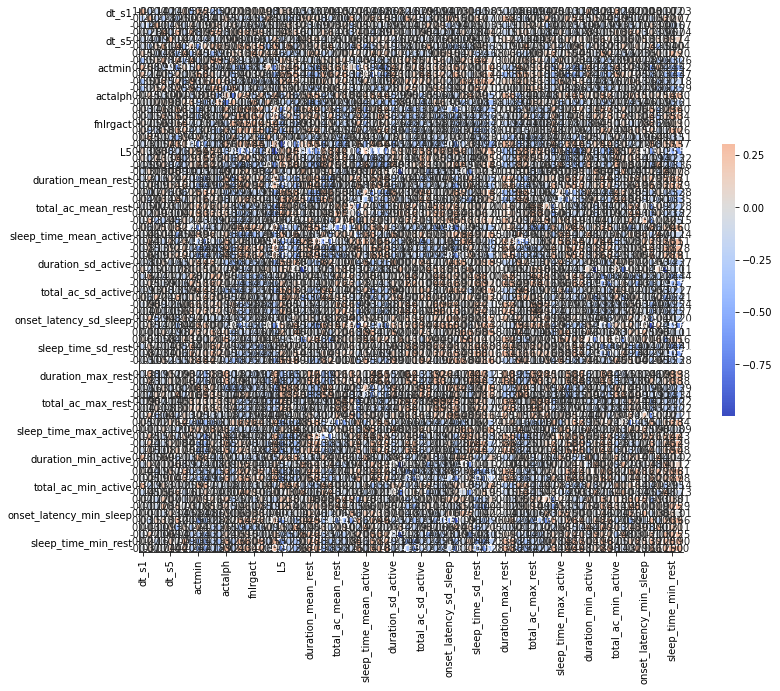

In [67]:
corr = d.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

## Correlation Plot Young Adults

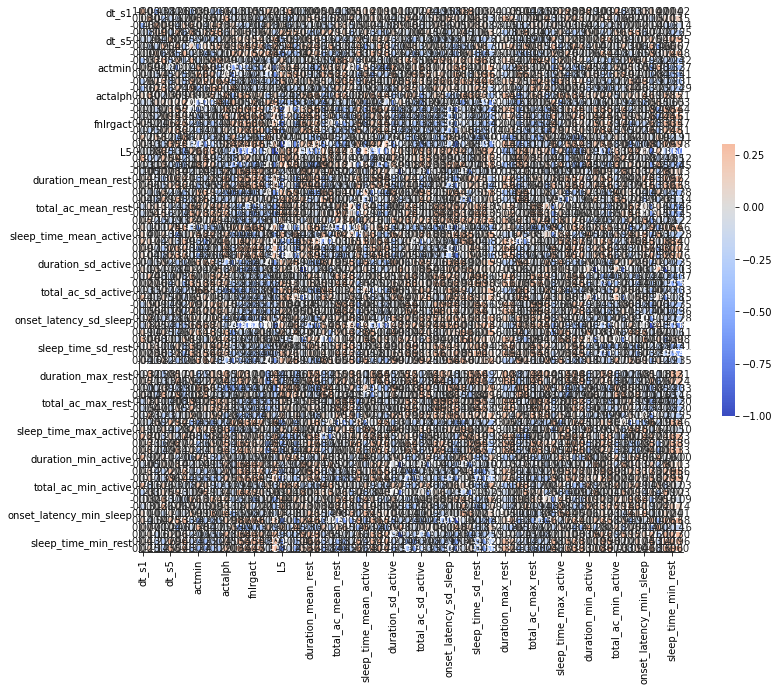

In [68]:
corr = d[d['Group'] == 'Young Adults'].corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

## Correlation Plot Older Adults

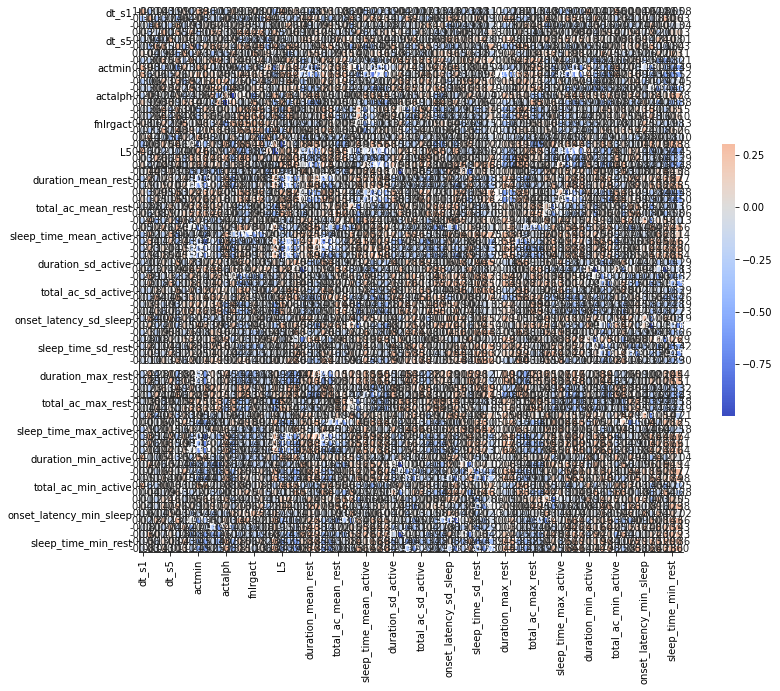

In [69]:
corr = d[d['Group'] == 'Older Adults'].corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

In [47]:
np = pd.read_csv(workdir + 'combined_data_new.csv')
npcols = ['record_id'] + np.columns[np.columns.str.contains('z_score|zscore')].tolist()
np = np[npcols]
np = np.set_index('record_id')
np.index = np.index.astype(str)
np

cvlt_b_zscore  cvlt_sdelay_recall_zscore  cvlt_sdelay_cued_zscore  \
record_id                                                                      
30003                NaN                        NaN                      NaN   
30004                NaN                        NaN                      NaN   
30008                NaN                        NaN                      NaN   
30009                NaN                        NaN                      NaN   
30010                NaN                        NaN                      NaN   
...                  ...                        ...                      ...   
40943                NaN                        NaN                      NaN   
40944                NaN                        NaN                      NaN   
40945                NaN                        NaN                      NaN   
40946                NaN                        NaN                      NaN   
40947                NaN                        NaN                      NaN   

           cvlt_ldelay_recall_zscore  cvlt_ldelay_cue_recall_zscore  \
record_id                                                             
30003                            NaN                            NaN   
30004                            NaN                            NaN   
30008                            NaN                            NaN   
30009                            NaN                            NaN   
30010                            NaN                            NaN   
...                              ...                            ...   
40943                            NaN                            NaN   
40944                            NaN                            NaN   
40945                            NaN                            NaN   
40946                            NaN                            NaN   
40947                            NaN                            NaN   

           cvlt_recognition_hits_zscore  cvlt_recognition_fp_zscore  \
record_id                                                             
30003                               NaN                         NaN   
30004                               NaN                         NaN   
30008                               NaN                         NaN   
30009                               NaN                         NaN   
30010                               NaN                         NaN   
...                                 ...                         ...   
40943                               NaN                         NaN   
40944                               NaN                         NaN   
40945                               NaN                         NaN   
40946                               NaN                         NaN   
40947                               NaN                         NaN   

           cvlt_zscore  vc_zscore  ds_zscore  stoop_i_zscore  cowat_zscore  \
record_id                                                                    
30003              NaN       0.00      -0.67             NaN           NaN   
30004              NaN       1.33      -1.67             NaN           NaN   
30008              NaN       2.67      -1.00             NaN           NaN   
30009              NaN       1.00       0.33             NaN           NaN   
30010              NaN        NaN        NaN             NaN           NaN   
...                ...        ...        ...             ...           ...   
40943              NaN        NaN        NaN             NaN           NaN   
40944              NaN        NaN        NaN             NaN           NaN   
40945              NaN        NaN        NaN             NaN           NaN   
40946              NaN        NaN        NaN             NaN           NaN   
40947              NaN        NaN        NaN             NaN           NaN   

           trails_a_z_score  trails_b_z_score  
record_id                                      
30003      

In [48]:
d = d.join(np)

In [49]:
corcols = d.columns[d.columns.str.contains('dt_s|zscore|z_score')]
corcols

Index(['dt_s1', 'dt_s2', 'dt_s3', 'dt_s4', 'cvlt_b_zscore',
       'cvlt_sdelay_recall_zscore', 'cvlt_sdelay_cued_zscore',
       'cvlt_ldelay_recall_zscore', 'cvlt_ldelay_cue_recall_zscore',
       'cvlt_recognition_hits_zscore', 'cvlt_recognition_fp_zscore',
       'cvlt_zscore', 'vc_zscore', 'ds_zscore', 'stoop_i_zscore',
       'cowat_zscore', 'trails_a_z_score', 'trails_b_z_score'],
      dtype='object')

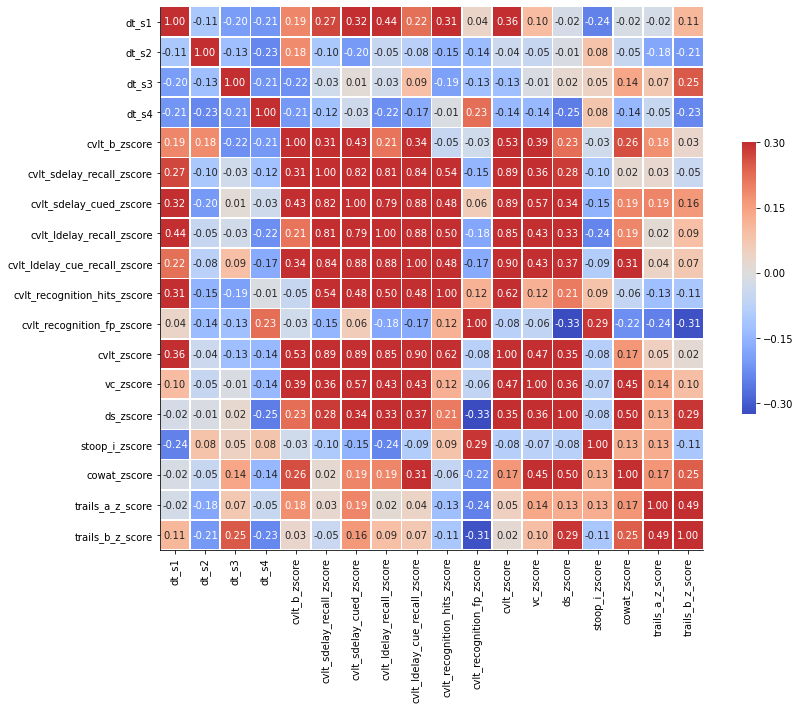

In [50]:
corr = d[corcols].corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

In [71]:
d = d[d['dt_s1'] < 100]

In [72]:
oa = d[d['Group'] == 'Older Adults']
ya = d[d['Group'] == 'Young Adults']

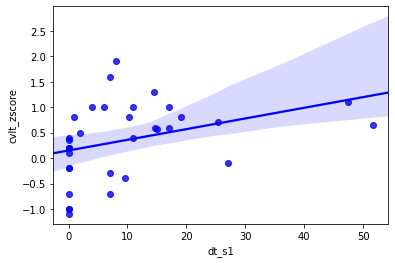

In [75]:
sns.regplot('dt_s1', 'cvlt_zscore', data = oa, color = 'b')

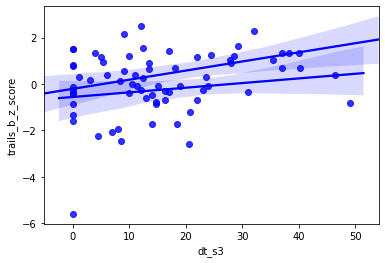

In [90]:
sns.regplot('dt_s3', 'trails_b_z_score', data = ya, color = 'b')
sns.regplot('dt_s3', 'trails_b_z_score', data = oa, color = 'b')

In [76]:
import statsmodels.formula.api as smf

model = smf.ols(formula='cvlt_zscore ~ dt_s1', data=oa).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cvlt_zscore   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     4.813
Date:                Thu, 10 Sep 2020   Prob (F-statistic):             0.0356
Time:                        11:47:12   Log-Likelihood:                -35.061
No. Observations:                  34   AIC:                             74.12
Df Residuals:                      32   BIC:                             77.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1497      0.152      0.984      0.333      -0.160       0.460
dt_s1          0.0210      0.010      2.194      0.036       0.002       0.040
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.168
Skew:                           0.029   Prob(JB):                        0.920
Kurtosis:                       2.661   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

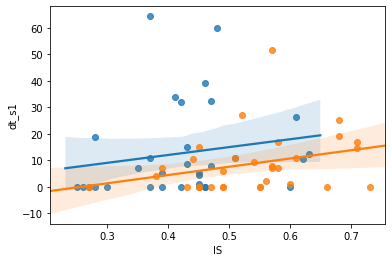

In [77]:
sns.regplot('IS', 'dt_s1', data = ya, order = 1)
sns.regplot('IS', 'dt_s1', data = oa, order = 1)

In [80]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s1 ~ IS', data=oa).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.824
Date:                Thu, 10 Sep 2020   Prob (F-statistic):              0.104
Time:                        11:48:15   Log-Likelihood:                -116.95
No. Observations:                  31   AIC:                             237.9
Df Residuals:                      29   BIC:                             240.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0557     10.178     -0.791      0.435     -28.872      12.761
IS            31.1937     18.564      1.680      0.104      -6.774      69.161
==============================================================================
Omnibus:                       29.163   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.806
Skew:                           2.050   Prob(JB):                     5.13e-15
Kurtosis:                       8.842   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
import statsmodels.formula.api as smf

model = smf.ols(formula='dt_s1 ~ actamp', data=oa).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dt_s1   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     3.545
Date:                Thu, 10 Sep 2020   Prob (F-statistic):             0.0688
Time:                        13:36:04   Log-Likelihood:                -132.43
No. Observations:                  34   AIC:                             268.9
Df Residuals:                      32   BIC:                             271.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.9327     13.294     -1.123      0.270     -42.011      12.146
actamp        15.9496      8.471      1.883      0.069      -1.306      33.205
==============================================================================
Omnibus:                       22.374   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.444
Skew:                           1.788   Prob(JB):                     9.01e-08
Kurtosis:                       6.181   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Number of Transitions

In [95]:
nt = pd.read_csv(homedir + '/Desktop/num_transitions_4.csv')
nt.index = nt['file'].str.split("processed/", expand=True)[1].str.split("_img", expand=True)[0]
nt.index = nt.index.astype(str)
nt = nt.drop('file', axis=1)
nt

num_trans
0               
30004          6
30008          7
30009          7
30012          7
30015         14
...          ...
40773          9
40777          6
40782          7
40796          5
40803         15

[76 rows x 1 columns]

In [96]:
d = d.join(nt)

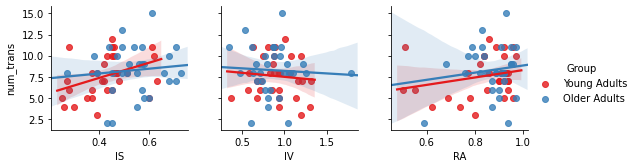

In [97]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['IS', 'IV', 'RA'], y_vars = ['num_trans'], palette = 'Set1')


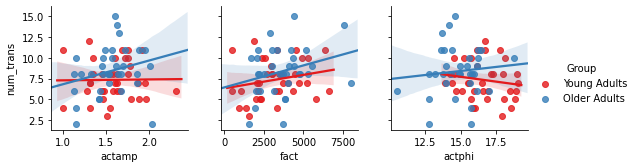

In [98]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['actamp', 'fact', 'actphi'], y_vars = ['num_trans'], palette = 'Set1')


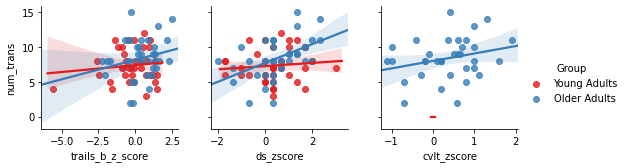

In [109]:
sns.pairplot(d, hue = 'Group', kind = 'reg', x_vars = ['trails_b_z_score', 'ds_zscore', 'cvlt_zscore'], y_vars = ['num_trans'], palette = 'Set1')
